In [41]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
zori_census_covid_biann = pd.read_csv('./zori_census_covid_biann')
zori_census_covid_biann = zori_census_covid_biann.iloc[:,1:]
zori_census_covid_biann_14_20 = zori_census_covid_biann[zori_census_covid_biann['year']<2021].reset_index(drop=True)
zori_census_covid_biann_14_20

,RegionName,year,rent_price,rent_next_biann,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,...,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita,zip_cases_to_ttl,zip_new_cases_to_ttl,zip_deaths_to_ttl,zip_new_deaths_to_ttl
0,1604,2014.0,1054.833333,1087.125000,15417.0,14057.0,1360.0,4737.0,1269.0,1780.0,...,102.0,46.0,611.0,5206.0,29422.0,25798.00,0.000000,0.000000,0.000000,0.000000
1,1604,2014.5,1087.125000,1119.416667,15427.5,14093.5,1334.0,4721.5,1288.0,1834.0,...,107.5,28.0,614.5,5742.5,29292.0,25623.00,0.000000,0.000000,0.000000,0.000000
2,1604,2015.0,1119.416667,1152.208333,15438.0,14130.0,1308.0,4706.0,1307.0,1888.0,...,113.0,10.0,618.0,6279.0,29162.0,25448.00,0.000000,0.000000,0.000000,0.000000
3,1604,2015.5,1152.208333,1185.000000,15547.5,14159.5,1388.0,4700.5,1267.5,1853.0,...,132.5,10.0,635.0,6379.0,29274.5,25855.50,0.000000,0.000000,0.000000,0.000000
4,1604,2016.0,1185.000000,1216.250000,15657.0,14189.0,1468.0,4695.0,1228.0,1818.0,...,152.0,10.0,652.0,6479.0,29387.0,26263.00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24355,99207,2018.5,1221.416667,1268.333333,13454.5,12117.0,1337.5,9804.0,292.5,1074.0,...,756.5,392.5,2163.5,2259.5,27800.0,19749.47,0.000000,0.000000,0.000000,0.000000
24356,99207,2019.0,1268.333333,1301.895833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
24357,99207,2019.5,1301.895833,1335.458333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
24358,99207,2020.0,1335.458333,1370.395833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000934,0.000651,0.000026,0.000013


In [3]:
zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']<2020.5].drop(
    'rent_next_biann',axis=1).iloc[:,2:]

,rent_price,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,...,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita,zip_cases_to_ttl,zip_new_cases_to_ttl,zip_deaths_to_ttl,zip_new_deaths_to_ttl
0,1054.833333,15417.0,14057.0,1360.0,4737.0,1269.0,1780.0,3970.0,1031.0,941.0,...,102.0,46.0,611.0,5206.0,29422.0,25798.00,0.000000,0.000000,0.000000,0.000000
1,1087.125000,15427.5,14093.5,1334.0,4721.5,1288.0,1834.0,3974.5,1013.5,932.5,...,107.5,28.0,614.5,5742.5,29292.0,25623.00,0.000000,0.000000,0.000000,0.000000
2,1119.416667,15438.0,14130.0,1308.0,4706.0,1307.0,1888.0,3979.0,996.0,924.0,...,113.0,10.0,618.0,6279.0,29162.0,25448.00,0.000000,0.000000,0.000000,0.000000
3,1152.208333,15547.5,14159.5,1388.0,4700.5,1267.5,1853.0,4150.5,1026.0,892.0,...,132.5,10.0,635.0,6379.0,29274.5,25855.50,0.000000,0.000000,0.000000,0.000000
4,1185.000000,15657.0,14189.0,1468.0,4695.0,1228.0,1818.0,4322.0,1056.0,860.0,...,152.0,10.0,652.0,6479.0,29387.0,26263.00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24354,1174.500000,13475.0,12030.0,1445.0,9822.0,259.0,1184.0,641.0,528.0,351.0,...,750.0,18.0,1857.0,2222.0,27486.0,19362.00,0.000000,0.000000,0.000000,0.000000
24355,1221.416667,13454.5,12117.0,1337.5,9804.0,292.5,1074.0,658.0,574.5,372.0,...,756.5,392.5,2163.5,2259.5,27800.0,19749.47,0.000000,0.000000,0.000000,0.000000
24356,1268.333333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,621.0,393.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
24357,1301.895833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,675.0,621.0,393.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000


### Base Model

In [4]:
x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']<2020.5].drop(
    'rent_next_biann',axis=1).iloc[:,2:]
y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']<2020.5]['rent_next_biann']
x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']==2020.5].drop(
    'rent_next_biann',axis=1).iloc[:,2:]
y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']==2020.5]['rent_next_biann']

In [5]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [6]:
# Regular Scores
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.998672441130259
Train Score (Adj R Sq): 0.9986323312354979
0.9592651582800028
Test Score (Adj R Sq): 0.9580344255029176


<Figure size 1600x2400 with 0 Axes>

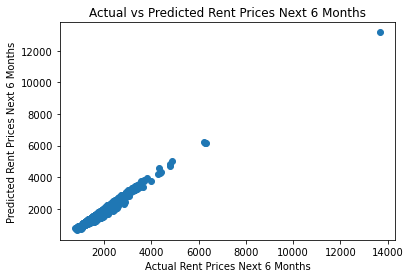

<Figure size 1600x2400 with 0 Axes>

In [7]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next 6 Months')
plt.xlabel('Actual Rent Prices Next 6 Months')
plt.ylabel('Predicted Rent Prices Next 6 Months')
plt.figure(figsize=(20, 30), dpi=80)

In [8]:
scaler = StandardScaler()
pca = PCA()
mlmodel = LinearRegression()

pipe = Pipeline(steps=[('pca', pca), ('mlmodel', mlmodel)])


param_grid = {
    'pca__n_components': range(1,zori_census_covid_biann_14_20.shape[1]-2,3)
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
search.best_params_

{'pca__n_components': 49}

In [9]:
pca = PCA(n_components = search.best_params_['pca__n_components'])
pca.fit(x_test)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [10]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [11]:
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.998672441130259
Train Score (Adj R Sq): 0.9986339497784145
0.959265158280523
Test Score (Adj R Sq): 0.9580840889052245


<Figure size 1600x2400 with 0 Axes>

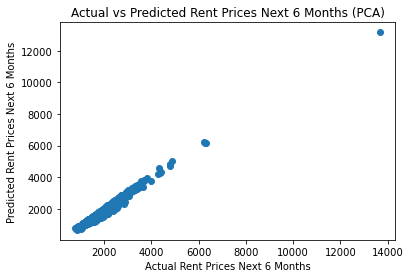

<Figure size 1600x2400 with 0 Axes>

In [12]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next 6 Months (PCA)')
plt.xlabel('Actual Rent Prices Next 6 Months')
plt.ylabel('Predicted Rent Prices Next 6 Months')
plt.figure(figsize=(20, 30), dpi=80)

### Model Using Only 2019 - 2020

In [13]:
x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']<2020.5].drop('rent_next_biann',axis=1).iloc[:,2:]
y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']<2020.5]['rent_next_biann']
x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']==2020.5].drop('rent_next_biann',axis=1).iloc[:,2:]
y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']==2020.5]['rent_next_biann']

<ipython-input-13-1b6ef760debb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-13-1b6ef760debb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-13-1b6ef760debb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-13-1b6ef760debb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][


In [14]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [15]:
# Regular Scores
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.9984525002015
Train Score (Adj R Sq): 0.998405745172043
0.9775911401920463
Test Score (Adj R Sq): 0.9769140952570904


<Figure size 1600x2400 with 0 Axes>

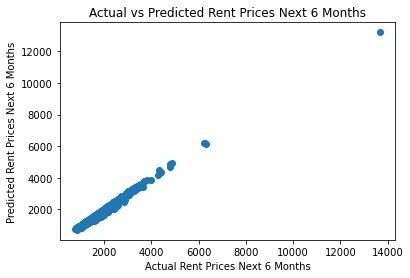

<Figure size 1600x2400 with 0 Axes>

In [16]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next 6 Months')
plt.xlabel('Actual Rent Prices Next 6 Months')
plt.ylabel('Predicted Rent Prices Next 6 Months')
plt.figure(figsize=(20, 30), dpi=80)

In [17]:
scaler = StandardScaler()
pca = PCA()
mlmodel = LinearRegression()

pipe = Pipeline(steps=[('pca', pca), ('mlmodel', mlmodel)])


param_grid = {
    'pca__n_components': range(1,zori_census_covid_biann_14_20.shape[1]-2,3)
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
search.best_params_

{'pca__n_components': 46}

In [18]:
pca = PCA(n_components = search.best_params_['pca__n_components'])
pca.fit(x_test)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [19]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [20]:
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.9984490279375206
Train Score (Adj R Sq): 0.9984068869364137
0.9892618587388744
Test Score (Adj R Sq): 0.9889700958930316


<Figure size 1600x2400 with 0 Axes>

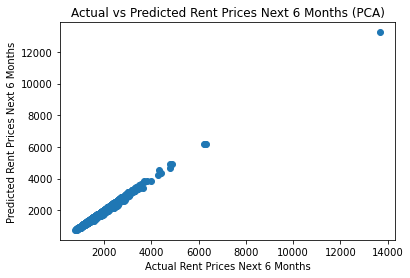

<Figure size 1600x2400 with 0 Axes>

In [23]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next 6 Months (PCA)')
plt.xlabel('Actual Rent Prices Next 6 Months')
plt.ylabel('Predicted Rent Prices Next 6 Months')
plt.figure(figsize=(20, 30), dpi=80)

### Reduce using Stepwise and Rerun Models

In [24]:
import statsmodels.api as sm

In [28]:
def forward_stepwise(y,X):
    # Create and fit the model
    X_add_const = sm.add_constant(X)
    continue_ = True
    stepnum = 1
    while continue_:

        ols = sm.OLS(y, X_add_const).fit()
        pvals = ols.pvalues.sort_values(ascending=False)
        if pvals.index[0] != "const":
            highest_pval = pvals[0]
            highest_pval_feat = pvals.index[0]
        elif pvals.index[0] == "const":
            highest_pval = pvals[1]
            highest_pval_feat = pvals.index[1]
        
        if highest_pval > 0.05:

            print(f'Step {stepnum}')
            print(f'Adj R Squared: {ols.rsquared_adj}')
            print(f'Feature with Largest p-value: {highest_pval_feat}, {highest_pval}')
            stepnum = stepnum + 1

            X_add_const = X_add_const.drop(highest_pval_feat, axis=1)
        else: 
            continue_ = False
    X = X_add_const.iloc[:,1:]
    return X

In [26]:
x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']<2020.5].drop('rent_next_biann',axis=1).iloc[:,2:]
y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']<2020.5]['rent_next_biann']
x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']==2020.5].drop('rent_next_biann',axis=1).iloc[:,2:]
y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']==2020.5]['rent_next_biann']

<ipython-input-26-1b6ef760debb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-26-1b6ef760debb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-26-1b6ef760debb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-26-1b6ef760debb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][


In [30]:
feats_to_keep = forward_stepwise(y_train,x_train).columns

Step 1
Adj R Squared: 0.9984381354770119
Feature with Largest p-value: housing_units, 0.9221842242061163
Step 2
Adj R Squared: 0.9984381354770119
Feature with Largest p-value: zip_new_deaths_to_ttl, 0.7542023767469404
Step 3
Adj R Squared: 0.9984384078538864
Feature with Largest p-value: housing_built_1939_or_earlier, 0.4896328444939395
Step 4
Adj R Squared: 0.9984385656126726
Feature with Largest p-value: zip_deaths_to_ttl, 0.21751365949028714
Step 5
Adj R Squared: 0.9984384083616437
Feature with Largest p-value: income_200000_or_more, 0.09103859771163267
Step 6
Adj R Squared: 0.9984378480062993
Feature with Largest p-value: income_100000_149999, 0.4435744684349828
Step 7
Adj R Squared: 0.9984379726198336
Feature with Largest p-value: income_75000_99999, 0.1716346850789406
Step 8
Adj R Squared: 0.9984377103835566
Feature with Largest p-value: other_race_pop, 0.09055864810163726
Step 9
Adj R Squared: 0.9984371475356658
Feature with Largest p-value: two_or_more_races_pop, 0.548366503630

In [36]:
feats_to_keep

Index(['rent_price', 'occupied_housing_units', 'vacant_housing_units',
       'dwellings_1_units_detached', 'dwellings_1_units_attached',
       'dwellings_2_units', 'dwellings_3_to_4_units', 'dwellings_5_to_9_units',
       'dwellings_10_to_19_units', 'dwellings_20_or_more_units',
       'mobile_homes', 'owner_occupied_housing_units_median_value',
       'median_rent', 'rent_under_15_percent', 'rent_15_to_20_percent',
       'rent_20_to_25_percent', 'rent_over_35_percent',
       'rent_burden_not_computed', 'million_dollar_housing_units',
       'median_income', 'income_less_10000', 'income_10000_14999',
       'income_15000_24999', 'income_25000_34999', 'income_35000_49999',
       'income_50000_74999', 'income_150000_199999', 'male_pop', 'pop_16_over',
       'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'amerindian_pop',
       'hispanic_any_race', 'not_hispanic_pop', 'income_per_capita',
       'zip_cases_to_ttl', 'zip_new_cases_to_ttl'],
      dtype='object')

In [43]:
x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']<2020.5].drop('rent_next_biann',axis=1)[feats_to_keep]
y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']<2020.5]['rent_next_biann']
x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']==2020.5].drop('rent_next_biann',axis=1)[feats_to_keep]
y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']==2020.5]['rent_next_biann']

<ipython-input-43-182b0a93bcba>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-43-182b0a93bcba>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-43-182b0a93bcba>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-43-182b0a93bcba>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][


0.9984472069441692
Train Score (Adj R Sq): 0.9984115840446531
0.981404733752503
Test Score (Adj R Sq): 0.9809781364680016


<Figure size 1600x2400 with 0 Axes>

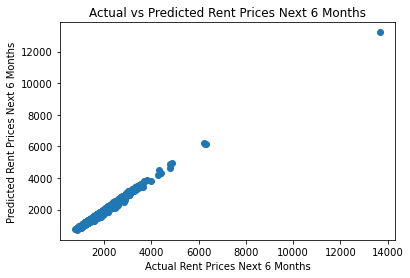

<Figure size 1600x2400 with 0 Axes>

In [44]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

# Regular Scores
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next 6 Months')
plt.xlabel('Actual Rent Prices Next 6 Months')
plt.ylabel('Predicted Rent Prices Next 6 Months')
plt.figure(figsize=(20, 30), dpi=80)

In [45]:
mlmodel.coef_

array([ 1.03295541e+00,  4.82344650e-02,  5.16994131e-02, -4.65119758e-02,
       -4.72696095e-02, -5.09597430e-02, -4.71030764e-02, -4.63933764e-02,
       -5.19898109e-02, -4.95057360e-02, -4.93220363e-02, -4.60039364e-05,
       -3.61069515e-02, -2.44019596e-02,  5.24176018e-03,  5.16330537e-03,
        5.77592477e-03,  8.39314867e-03,  5.74580505e-03, -1.54357581e-04,
       -1.30308425e+00, -5.15902161e+00, -5.38899207e-01, -1.06977437e+00,
       -1.45412913e+00, -5.42962943e-01, -9.64140172e-01, -1.58764180e-03,
       -1.88798415e-03, -3.99169665e-04, -7.78402075e-04, -9.83406983e-04,
        1.27564095e-03,  6.26563075e-03,  4.45674482e-04,  8.79376655e-04,
       -6.47593463e-04, -3.38634296e+04,  5.48408699e+04])

In [47]:
mlm_coef_list = [lis_ for lis_ in mlmodel.coef_]
mlm_coefs = pd.DataFrame({'Features':x_test.columns, 'Coefficients':mlm_coef_list}).sort_values(by='Coefficients', ascending=False)
mlm_coefs_strong = pd.concat((mlm_coefs.head(10), mlm_coefs.tail(10)), axis=0)
mlm_coefs_strong

,Features,Coefficients
38,zip_new_cases_to_ttl,54840.869914
0,rent_price,1.032955
2,vacant_housing_units,0.051699
1,occupied_housing_units,0.048234
17,rent_burden_not_computed,0.008393
33,amerindian_pop,0.006266
16,rent_over_35_percent,0.005776
18,million_dollar_housing_units,0.005746
14,rent_15_to_20_percent,0.005242
15,rent_20_to_25_percent,0.005163


In [48]:
mlm_coefs_df = mlm_coefs[list(map(any, zip(mlm_coefs['Coefficients']>1, mlm_coefs['Coefficients']<-1)))]
mlm_coefs_df

,Features,Coefficients
38,zip_new_cases_to_ttl,54840.869914
0,rent_price,1.032955
23,income_25000_34999,-1.069774
20,income_less_10000,-1.303084
24,income_35000_49999,-1.454129
21,income_10000_14999,-5.159022
37,zip_cases_to_ttl,-33863.429645


{'pca__n_components': 37}
0.9983615214389386
Train Score (Adj R Sq): 0.9983259023397851
0.9965756597813907
Test Score (Adj R Sq): 0.9965012176027254


<Figure size 1600x2400 with 0 Axes>

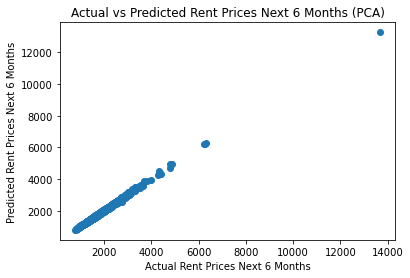

<Figure size 1600x2400 with 0 Axes>

In [34]:
scaler = StandardScaler()
pca = PCA()
mlmodel = LinearRegression()

pipe = Pipeline(steps=[('pca', pca), ('mlmodel', mlmodel)])


param_grid = {
    'pca__n_components': range(1,zori_census_covid_biann_14_20.shape[1]-2,3)
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
print(search.best_params_)

pca = PCA(n_components = search.best_params_['pca__n_components'])
pca.fit(x_test)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next 6 Months (PCA)')
plt.xlabel('Actual Rent Prices Next 6 Months')
plt.ylabel('Predicted Rent Prices Next 6 Months')
plt.figure(figsize=(20, 30), dpi=80)

In [42]:
mean_squared_error(y_test, y_predicted,squared=False)

37.69800152848205

In [22]:
# x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
#     zori_census_covid_biann_14_20['year']<2020.5].drop('rent_next_biann',axis=1)[['rent_price']]
# y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
#     zori_census_covid_biann_14_20['year']<2020.5]['rent_next_biann']
# x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
#     zori_census_covid_biann_14_20['year']==2020.5].drop('rent_next_biann',axis=1)[['rent_price']]
# y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
#     zori_census_covid_biann_14_20['year']==2020.5]['rent_next_biann']